In [8]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

### data

In [39]:
all_data = {}
for f in os.listdir("report"):
    if f != ".gitignore":
        print(f)
        with open("report/" + f) as fl:
            data = json.load(fl)
        all_data[f] = data

cpu_False_onnx_False_fp16_False.json
cpu_True_onnx_False_fp16_False.json
cpu_False_onnx_True_fp16_False.json
cpu_True_onnx_True_fp16_False.json
cpu_False_onnx_True_fp16_True.json


In [40]:
mean_times = []
for k, v in all_data.items():
    for batch_size, timings in v.items():
        mean_times.append((k, batch_size, np.mean(timings)))

In [41]:
mean_times = pd.DataFrame(mean_times, columns=["config", "batch_size", "latency"])
mean_times

,config,batch_size,latency
0,cpu_False_onnx_False_fp16_False.json,1,0.006658
1,cpu_False_onnx_False_fp16_False.json,8,0.007690
2,cpu_False_onnx_False_fp16_False.json,64,0.018885
3,cpu_False_onnx_False_fp16_False.json,128,0.039187
4,cpu_True_onnx_False_fp16_False.json,1,0.023136
5,cpu_True_onnx_False_fp16_False.json,8,0.109189
6,cpu_True_onnx_False_fp16_False.json,64,0.899757
7,cpu_True_onnx_False_fp16_False.json,128,1.883784
8,cpu_False_onnx_True_fp16_False.json,1,0.001580
9,cpu_False_onnx_True_fp16_False.json,8,0.004053


In [51]:
updated_configs = []
for c in mean_times.config:
    updated_config = ""
    if "cpu_True" in c:
        updated_config = "cpu"
    else:
        updated_config = "gpu"
    if "onnx_True" in c:
        updated_config += "/pytorch+onnx"
    else:
        updated_config += "/pytorch"
    if "fp16_True" in c:
        updated_config += "/fp16"
    else:
        updated_config += "/fp32"
    updated_configs.append(updated_config)
mean_times["updated_config"] = updated_configs
mean_times

,config,batch_size,latency,updated_config
0,cpu_False_onnx_False_fp16_False.json,1,0.006658,gpu/pytorch/fp32
1,cpu_False_onnx_False_fp16_False.json,8,0.007690,gpu/pytorch/fp32
2,cpu_False_onnx_False_fp16_False.json,64,0.018885,gpu/pytorch/fp32
3,cpu_False_onnx_False_fp16_False.json,128,0.039187,gpu/pytorch/fp32
4,cpu_True_onnx_False_fp16_False.json,1,0.023136,cpu/pytorch/fp32
5,cpu_True_onnx_False_fp16_False.json,8,0.109189,cpu/pytorch/fp32
6,cpu_True_onnx_False_fp16_False.json,64,0.899757,cpu/pytorch/fp32
7,cpu_True_onnx_False_fp16_False.json,128,1.883784,cpu/pytorch/fp32
8,cpu_False_onnx_True_fp16_False.json,1,0.001580,gpu/pytorch+onnx/fp32
9,cpu_False_onnx_True_fp16_False.json,8,0.004053,gpu/pytorch+onnx/fp32


In [75]:
mean_times["device"] = mean_times.updated_config.apply(lambda x: "cpu" if "cpu" in x else "gpu")
mean_times

,config,batch_size,latency,updated_config,device
0,cpu_False_onnx_False_fp16_False.json,1,0.006658,gpu/pytorch/fp32,gpu
1,cpu_False_onnx_False_fp16_False.json,8,0.007690,gpu/pytorch/fp32,gpu
2,cpu_False_onnx_False_fp16_False.json,64,0.018885,gpu/pytorch/fp32,gpu
3,cpu_False_onnx_False_fp16_False.json,128,0.039187,gpu/pytorch/fp32,gpu
4,cpu_True_onnx_False_fp16_False.json,1,0.023136,cpu/pytorch/fp32,cpu
5,cpu_True_onnx_False_fp16_False.json,8,0.109189,cpu/pytorch/fp32,cpu
6,cpu_True_onnx_False_fp16_False.json,64,0.899757,cpu/pytorch/fp32,cpu
7,cpu_True_onnx_False_fp16_False.json,128,1.883784,cpu/pytorch/fp32,cpu
8,cpu_False_onnx_True_fp16_False.json,1,0.001580,gpu/pytorch+onnx/fp32,gpu
9,cpu_False_onnx_True_fp16_False.json,8,0.004053,gpu/pytorch+onnx/fp32,gpu


<ipython-input-97-c14c4b8ffe74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_data.sort_values(by=["batch_size", "latency"], inplace=True)
<ipython-input-97-c14c4b8ffe74>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
<ipython-input-97-c14c4b8ffe74>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
<ipython-input-97-c14c4b8ffe74>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
<ipython-input-97-c14c4b8ffe74>:6:

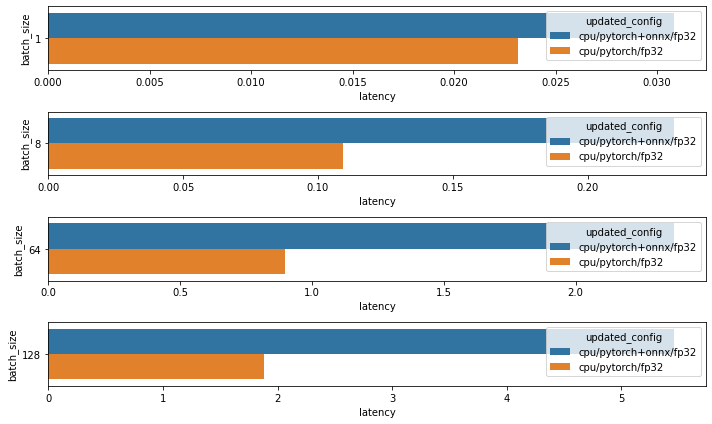

In [97]:
cpu_data = mean_times[mean_times.device=="cpu"]
cpu_data.sort_values(by=["batch_size", "latency"], inplace=True)
fig, axs = plt.subplots(cpu_data.batch_size.nunique(), 1, figsize=(10, 6))
for i, batch_size in enumerate(sorted(list(map(int, cpu_data.batch_size.unique().tolist())))):
    sns.barplot(ax=axs[i],
                data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
                y="batch_size", x="latency", hue="updated_config");
plt.tight_layout()

<ipython-input-98-5666f6e44fc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_data.sort_values(by=["batch_size", "latency"], inplace=True)
<ipython-input-98-5666f6e44fc1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
<ipython-input-98-5666f6e44fc1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
<ipython-input-98-5666f6e44fc1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
<ipython-input-98-5666f6e44fc1>:6:

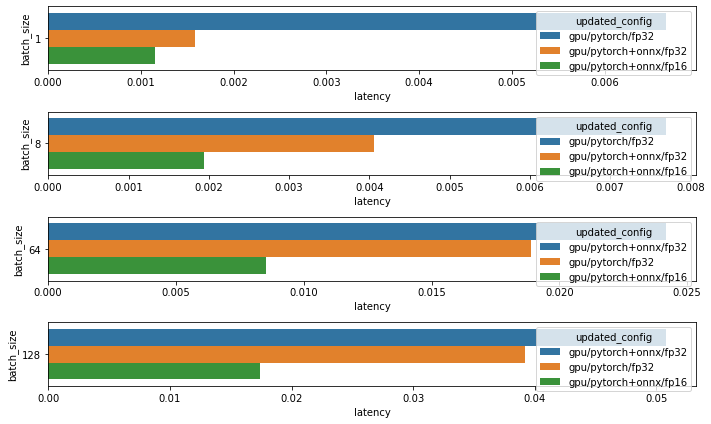

In [98]:
cpu_data = mean_times[mean_times.device=="gpu"]
cpu_data.sort_values(by=["batch_size", "latency"], inplace=True)
fig, axs = plt.subplots(cpu_data.batch_size.nunique(), 1, figsize=(10, 6))
for i, batch_size in enumerate(sorted(list(map(int, cpu_data.batch_size.unique().tolist())))):
    sns.barplot(ax=axs[i],
                data=cpu_data[mean_times.batch_size==str(batch_size)].sort_values(by="latency", ascending=False),
                y="batch_size", x="latency", hue="updated_config");
plt.tight_layout()